<a href="https://colab.research.google.com/github/OlekanmaVictoria/Artificial-intelligence-Data-science-Portfolio/blob/main/Image_Segmentation_Analyis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: Extract the Images
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = "/content/Combined_EPC_Images.zip"
extracted_dir = "/content/extracted_combined_images/"

# Create a directory to extract images
os.makedirs(extracted_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List extracted files to verify
extracted_files = []
for root, dirs, files in os.walk(extracted_dir):
    for name in files:
        extracted_files.append(os.path.join(root, name))

print(f"Extracted files: {extracted_files[:10]}")  # Display the first 10 files


Extracted files: ['/content/extracted_combined_images/EPC Colony Quiz 2/image_10.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_11.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_45.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_59.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_46.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_56.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_9.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_2.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_17.jpg', '/content/extracted_combined_images/EPC Colony Quiz 2/image_43.jpg']


# **Step 2: Install Necessary Libraries**

In [ ]:
!pip install opencv-python-headless cellpose matplotlib pandas


# **Step 3: Import Necessary Libraries and Define Paths**

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cellpose import models
import pandas as pd
import os

# Paths
input_dir = extracted_dir
output_dir = "/content/processed_images/"
combined_dir = "/content/combined_images/"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(combined_dir, exist_ok=True)


# **Step 4: Preprocess the Images**

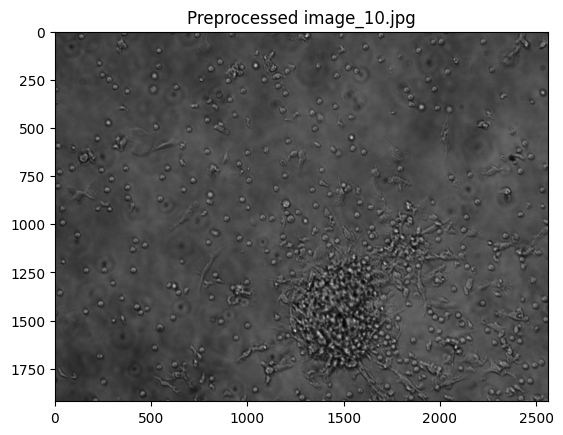

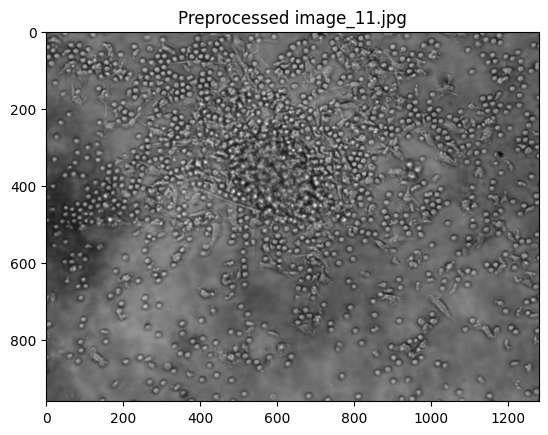

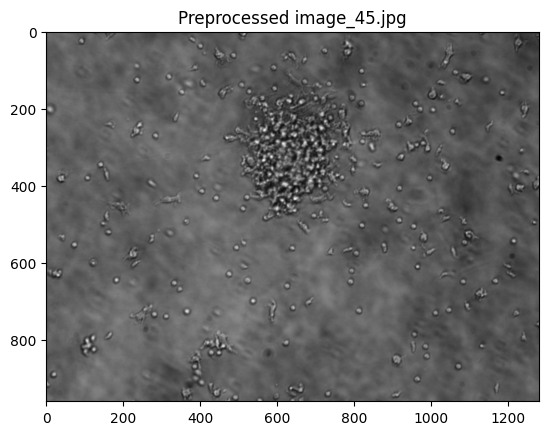

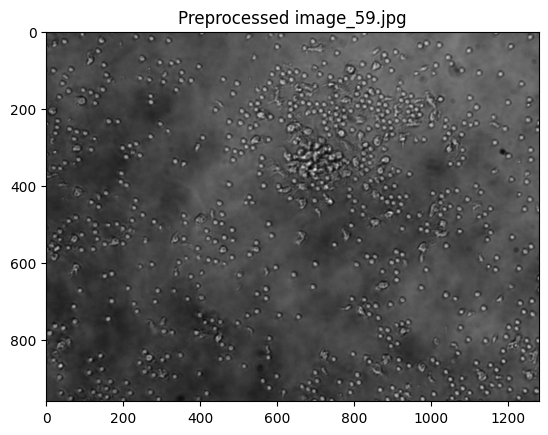

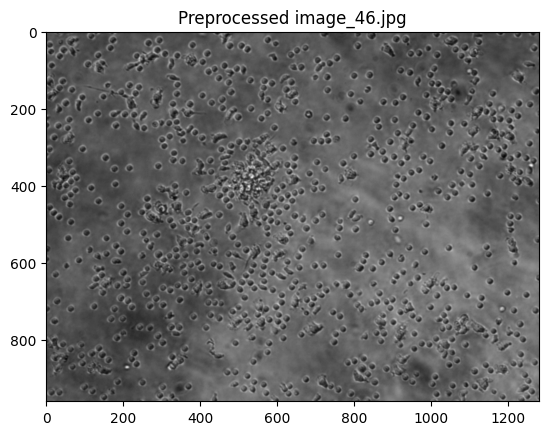

In [ ]:
# List of supported image extensions
supported_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.tif')

# Function to preprocess images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error reading image: {image_path}")
        return None
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    return blurred_image

# Test preprocessing on the first few images
for filename in extracted_files[:5]:
    if filename.lower().endswith(supported_extensions):
        image_path = filename
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is not None:
            plt.imshow(preprocessed_image, cmap='gray')
            plt.title(f"Preprocessed {os.path.basename(filename)}")
            plt.show()
    else:
        print(f"Skipping non-image file: {filename}")


# **Step 6: Analyze Colors and Structures**

In [ ]:
# Function to save segmented images
def save_segmented_image(masks, filename):
    plt.imsave(filename, masks, cmap='gray')
    print(f"Segmented image saved: {filename}")

# Function to save color and structure information to a CSV file
def save_analysis_data(color_info, structure_info, filename):
    data = {'Average Color': color_info, 'Structure': structure_info}
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)
    print(f"Analysis data saved: {filename}")

# Function to create and save combined images
def create_combined_image(original_image, masks, filename):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')
    ax[1].imshow(masks, cmap='gray')
    ax[1].set_title('Segmented Image')
    combined_path = os.path.join(combined_dir, filename)
    plt.savefig(combined_path)
    plt.close(fig)
    print(f"Combined image saved: {combined_path}")

# Process and save each image
for filename in extracted_files:
    if filename.lower().endswith(supported_extensions):
        image_path = filename
        print(f"Processing image: {image_path}")
        original_image = cv2.imread(image_path)
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is None:
            continue
        masks = segment_image(preprocessed_image)
        color_info = analyze_colors(original_image, masks)
        structure_info = identify_structures(masks)

        # Save results
        base_filename = os.path.splitext(os.path.basename(filename))[0]
        segmented_image_path = os.path.join(output_dir, f"{base_filename}_segmented.png")
        csv_path = os.path.join(output_dir, f"{base_filename}_analysis.csv")

        save_segmented_image(masks, segmented_image_path)
        save_analysis_data(color_info, structure_info, csv_path)
        create_combined_image(original_image, masks, f"{base_filename}_combined.png")

        # Print cell information
        for i, color in enumerate(color_info):
            print(f'Cell {i + 1}: Average Color - {color}, Structure - {structure_info[i]}')
    else:
        print(f"Skipping non-image file: {filename}")


Streaming output truncated to the last 5000 lines.
Cell 4: Average Color - [126.26214405 122.44974874 145.60552764], Structure - EPC-CFU
Cell 5: Average Color - [119.88090349 116.15605749 135.8275154 ], Structure - EPC-CFU
Cell 6: Average Color - [109.61035226 106.54061826 128.53630482], Structure - EPC-CFU
Cell 7: Average Color - [133.54080717 127.8735426  153.95874439], Structure - EPC-CFU
Cell 8: Average Color - [127.36904762 123.81092437 147.60014006], Structure - EPC-CFU
Cell 9: Average Color - [112.58423913 107.55887681 128.02717391], Structure - EPC-CFU
Cell 10: Average Color - [111.95       107.82945205 128.55821918], Structure - EPC-CFU
Cell 11: Average Color - [127.20619785 126.38855781 152.7318236 ], Structure - EPC-CFU
Cell 12: Average Color - [119.34539732 114.86073958 139.0086546 ], Structure - EPC-CFU
Cell 13: Average Color - [119.52534113 112.93274854 137.61890838], Structure - EPC-CFU
Cell 14: Average Color - [109.6969112  107.07786358 130.71621622], Structure - EPC-CF

KeyboardInterrupt: 

# **Step 7: Save the Results**

In [ ]:
# Function to save segmented images
def save_segmented_image(masks, filename):
    plt.imsave(filename, masks, cmap='gray')

# Function to save color and structure information to a CSV file
def save_analysis_data(color_info, structure_info, filename):
    data = {'Average Color': color_info, 'Structure': structure_info}
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

# Function to create and save combined images
def create_combined_image(original_image, masks, filename):
    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')
    ax[1].imshow(masks, cmap='gray')
    ax[1].set_title('Segmented Image')
    combined_path = os.path.join(combined_dir, filename)
    plt.savefig(combined_path)
    plt.close(fig)

# Process and save each image
for filename in extracted_files:
    if filename.lower().endswith(supported_extensions):
        image_path = filename
        print(f"Processing image: {image_path}")
        original_image = cv2.imread(image_path)
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is None:
            continue
        masks = segment_image(preprocessed_image)
        color_info = analyze_colors(original_image, masks)
        structure_info = identify_structures(masks)

        # Save results
        base_filename = os.path.splitext(os.path.basename(filename))[0]
        segmented_image_path = os.path.join(output_dir, f"{base_filename}_segmented.png")
        csv_path = os.path.join(output_dir, f"{base_filename}_analysis.csv")

        save_segmented_image(masks, segmented_image_path)
        save_analysis_data(color_info, structure_info, csv_path)
        create_combined_image(original_image, masks, f"{base_filename}_combined.png")

        # Print cell information
        for i, color in enumerate(color_info):
            print(f'Cell {i + 1}: Average Color - {color}, Structure - {structure_info[i]}')
    else:
        print(f"Skipping non-image file: {filename}")


# **Step 8: Export the Results**

In [ ]:
# Verify that files have been saved in the output directories
print("Files in processed_images directory:")
processed_files = os.listdir(output_dir)
print(processed_files)

print("Files in combined_images directory:")
combined_files = os.listdir(combined_dir)
print(combined_files)

# Zip and export the results
from google.colab import files
!zip -r processed_images.zip /content/processed_images/
!zip -r combined_images.zip /content/combined_images/
files.download('processed_images.zip')
files.download('combined_images.zip')


Files in processed_images directory:
['image_3_segmented.png', 'image_19_analysis.csv', 'image_7_analysis.csv', 'image_56_segmented.png', 'image_43_segmented.png', 'image_2_analysis.csv', 'image_45_segmented.png', 'image_49_segmented.png', 'image_19_segmented.png', 'image_17_analysis.csv', 'image_11_analysis.csv', 'image_60_segmented.png', 'image_56_analysis.csv', 'image_50_analysis.csv', 'image_57_analysis.csv', 'image_31_segmented.png', 'image_69_segmented.png', 'image_57_segmented.png', 'image_65_analysis.csv', 'image_33_analysis.csv', 'image_9_segmented.png', 'image_3_analysis.csv', 'image_46_analysis.csv', 'image_66_analysis.csv', 'image_49_analysis.csv', 'image_46_segmented.png', 'image_11_segmented.png', 'image_55_segmented.png', 'image_9_analysis.csv', 'image_10_segmented.png', 'image_24_segmented.png', 'image_52_analysis.csv', 'image_58_segmented.png', 'image_31_analysis.csv', 'image_66_segmented.png', 'image_7_segmented.png', 'image_50_segmented.png', 'image_45_analysis.csv',

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>